This notebook contains exploratory data analysis of covid-19 trials.

In [1]:
import requests
import json
import pandas as pd
import datetime
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

Since we can get only 1000 trials as the result of this api query and the total number of covid-19 trials exceed 100, we will have to break our query in 2 parts. The first part will cover first thousand results `&min_rnk=1&max_rnk=1000`, the second part would cover next thousand `&min_rnk=1001&max_rnk=2000` and so on.

In [3]:
CDC_BASE_URL = 'https://clinicaltrials.gov/api/query/study_fields?expr=COVID-19&min_rnk=1&max_rnk=1000&fmt=json'

In [4]:
cdc_extract_fields = [
    'NCTId',
    'DesignAllocation',
    'DesignMasking',
    'DesignMaskingDescription',
    'DesignPrimaryPurpose',
    'EnrollmentCount',
    'InterventionName',
    'InterventionType',
    'LastKnownStatus',
    'LeadSponsorName',
    'OutcomeAnalysisStatisticalMethod',
    'OutcomeMeasureTimeFrame',
    'StartDate',
    'StudyFirstPostDate',
    'StudyFirstPostDateType',
    'StudyFirstSubmitDate',
    'StudyFirstSubmitQCDate',
    'StudyPopulation',
    'StudyType',
    'WhyStopped'
]

In [5]:
query_url = f'{CDC_BASE_URL}&fields={",".join(cdc_extract_fields)}'
print(query_url)

https://clinicaltrials.gov/api/query/study_fields?expr=COVID-19&min_rnk=1&max_rnk=1000&fmt=json&fields=NCTId,DesignAllocation,DesignMasking,DesignMaskingDescription,DesignPrimaryPurpose,EnrollmentCount,InterventionName,InterventionType,LastKnownStatus,LeadSponsorName,OutcomeAnalysisStatisticalMethod,OutcomeMeasureTimeFrame,StartDate,StudyFirstPostDate,StudyFirstPostDateType,StudyFirstSubmitDate,StudyFirstSubmitQCDate,StudyPopulation,StudyType,WhyStopped


In [6]:
r = requests.get(query_url)
r.status_code

200

In [7]:
j = json.loads(r.content)
df1 = pd.DataFrame(j['StudyFieldsResponse']['StudyFields'])
df1.shape

(1000, 21)

In [8]:
# Let's get the next 1000
CDC_BASE_URL = 'https://clinicaltrials.gov/api/query/study_fields?expr=COVID-19&min_rnk=1001&max_rnk=2000&fmt=json'
query_url = f'{CDC_BASE_URL}&fields={",".join(cdc_extract_fields)}'
r = requests.get(query_url)
r.status_code
j = json.loads(r.content)
df2 = pd.DataFrame(j['StudyFieldsResponse']['StudyFields'])
df2.shape

(373, 21)

In [9]:
df_base = pd.concat([df1, df2])
df_base.shape

(1373, 21)

There are total 1373 trials registered on clinicaltrials.gov for covid-19, as of may 8th 2020

In [10]:
df = df_base
df.head()

,Rank,NCTId,DesignAllocation,DesignMasking,DesignMaskingDescription,DesignPrimaryPurpose,EnrollmentCount,InterventionName,InterventionType,LastKnownStatus,...,OutcomeAnalysisStatisticalMethod,OutcomeMeasureTimeFrame,StartDate,StudyFirstPostDate,StudyFirstPostDateType,StudyFirstSubmitDate,StudyFirstSubmitQCDate,StudyPopulation,StudyType,WhyStopped
0,1,[NCT04372004],[Non-Randomized],[None (Open Label)],[],[Diagnostic],[100],[diagnostic tests for COVID-19 infection],[Diagnostic Test],[],...,[],[],[May 2020],"[May 1, 2020]",[Actual],"[April 29, 2020]","[April 29, 2020]",[],[Interventional],[]
1,2,[NCT04367805],[],[],[],[],[50],[nasopharyngeal Covid 19 RT-PCR],[Diagnostic Test],[],...,[],[],"[April 27, 2020]","[April 29, 2020]",[Actual],"[April 27, 2020]","[April 27, 2020]","[hepatocellular carcinoma population, both hos...",[Observational],[]
2,3,[NCT04342637],[],[],[],[],[40],[Practice details],[Other],[],...,[],[],"[April 10, 2020]","[April 13, 2020]",[Actual],"[April 7, 2020]","[April 8, 2020]",[- physicians working and practicing in gastro...,[Observational],[]
3,4,[NCT04323787],[],[],[],[],[50000],[observational],[Other],[],...,[],[],"[March 30, 2020]","[March 27, 2020]",[Actual],"[March 24, 2020]","[March 25, 2020]",[COVID-19 Hospitalized patients],[Observational],[]
4,5,[NCT04339322],[],[],[],[],[200],[Follow up],[Other],[],...,[],[],"[May 1, 2020]","[April 9, 2020]",[Actual],"[April 7, 2020]","[April 7, 2020]",[Patients with clinical presentation and confi...,[Observational],[]


In [11]:
tt = df['NCTId'].str[0]
tt.head()

0    NCT04372004
1    NCT04367805
2    NCT04342637
3    NCT04323787
4    NCT04339322
Name: NCTId, dtype: object

In [12]:
for col in df.columns[1:]:
    print(col)
    df[col] = df[col].str[0]

NCTId
DesignAllocation
DesignMasking
DesignMaskingDescription
DesignPrimaryPurpose
EnrollmentCount
InterventionName
InterventionType
LastKnownStatus
LeadSponsorName
OutcomeAnalysisStatisticalMethod
OutcomeMeasureTimeFrame
StartDate
StudyFirstPostDate
StudyFirstPostDateType
StudyFirstSubmitDate
StudyFirstSubmitQCDate
StudyPopulation
StudyType
WhyStopped


In [13]:
df.head()

,Rank,NCTId,DesignAllocation,DesignMasking,DesignMaskingDescription,DesignPrimaryPurpose,EnrollmentCount,InterventionName,InterventionType,LastKnownStatus,...,OutcomeAnalysisStatisticalMethod,OutcomeMeasureTimeFrame,StartDate,StudyFirstPostDate,StudyFirstPostDateType,StudyFirstSubmitDate,StudyFirstSubmitQCDate,StudyPopulation,StudyType,WhyStopped
0,1,NCT04372004,Non-Randomized,None (Open Label),NaN,Diagnostic,100,diagnostic tests for COVID-19 infection,Diagnostic Test,NaN,...,NaN,NaN,May 2020,"May 1, 2020",Actual,"April 29, 2020","April 29, 2020",NaN,Interventional,NaN
1,2,NCT04367805,NaN,NaN,NaN,NaN,50,nasopharyngeal Covid 19 RT-PCR,Diagnostic Test,NaN,...,NaN,NaN,"April 27, 2020","April 29, 2020",Actual,"April 27, 2020","April 27, 2020","hepatocellular carcinoma population, both hosp...",Observational,NaN
2,3,NCT04342637,NaN,NaN,NaN,NaN,40,Practice details,Other,NaN,...,NaN,NaN,"April 10, 2020","April 13, 2020",Actual,"April 7, 2020","April 8, 2020",- physicians working and practicing in gastroi...,Observational,NaN
3,4,NCT04323787,NaN,NaN,NaN,NaN,50000,observational,Other,NaN,...,NaN,NaN,"March 30, 2020","March 27, 2020",Actual,"March 24, 2020","March 25, 2020",COVID-19 Hospitalized patients,Observational,NaN
4,5,NCT04339322,NaN,NaN,NaN,NaN,200,Follow up,Other,NaN,...,NaN,NaN,"May 1, 2020","April 9, 2020",Actual,"April 7, 2020","April 7, 2020",Patients with clinical presentation and confir...,Observational,NaN


In [14]:
df.StudyType.unique()

array(['Interventional', 'Observational', 'Expanded Access'], dtype=object)

### Distribution of Trial Registrations of CT.gov

In [15]:
df["StudyFirstPostDate"] = df["StudyFirstPostDate"].astype("datetime64")
df.StudyFirstPostDate.max(), df.StudyFirstPostDate.min()

(Timestamp('2020-05-08 00:00:00'), Timestamp('2011-03-01 00:00:00'))

According to WHO the first case of covid-19 was found in December 2019. So let's use that as a cutoff date

In [24]:
df = df[df.StudyFirstPostDate>datetime.date(2020,1,1)]
df.shape

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


(1338, 21)

In [25]:
df.StudyFirstPostDate.max(), df.StudyFirstPostDate.min()

(Timestamp('2020-05-08 00:00:00'), Timestamp('2020-01-27 00:00:00'))

^ Now the dates look good

In [26]:
df.groupby([df["StudyFirstPostDate"].dt.month]).NCTId.count()

StudyFirstPostDate
1      3
2     61
3    179
4    857
5    238
Name: NCTId, dtype: int64

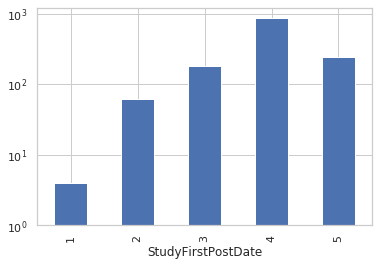

In [27]:
# Let's plot the resukts on log scale since it varies from 3 to 857
df.groupby([df["StudyFirstPostDate"].dt.month]).NCTId.count().plot(kind="bar", log=True)

### Covid-19 clinicaltrials since Jan 1st, 2020,<br>
Jan 2020 - 3<br>
Feb 2020 - 61<br>
Mar 2020 - 179<br>
Apr 2020 - 857<br>
May 2020 - 238 (till 8th May only)

### Let's look at the types of intervention

In [28]:
df.shape

(1338, 21)

In [29]:
# Select Interentional trials 
df = df[df.StudyType=='Interventional']
df.shape

(787, 21)

#### ^ Roughly 60% of trials are interventional

In [30]:
# Let's see what kind of interventions they are recieving
tt = pd.DataFrame(df.groupby("InterventionType").InterventionType.count())
tt = tt.rename(index=str, columns={"InterventionType": "Trial_Count"})
tt['Intervention_Type'] = tt.index
tt = tt.reset_index(drop=True)
tt=tt.sort_values(by=['Trial_Count'], ascending=False)
tt

,Trial_Count,Intervention_Type
6,465,Drug
1,99,Biological
8,76,Other
3,48,Device
0,38,Behavioral
4,20,Diagnostic Test
9,18,Procedure
5,11,Dietary Supplement
2,7,Combination Product
10,3,Radiation


#### ^ As expected majority of the trials (564 out of 787, or 71.66 %) are recieving Drug or Biological interventions.

#### However, surprisingly only 20 trials (~ 2.5%) are associated with diagnostic tests.

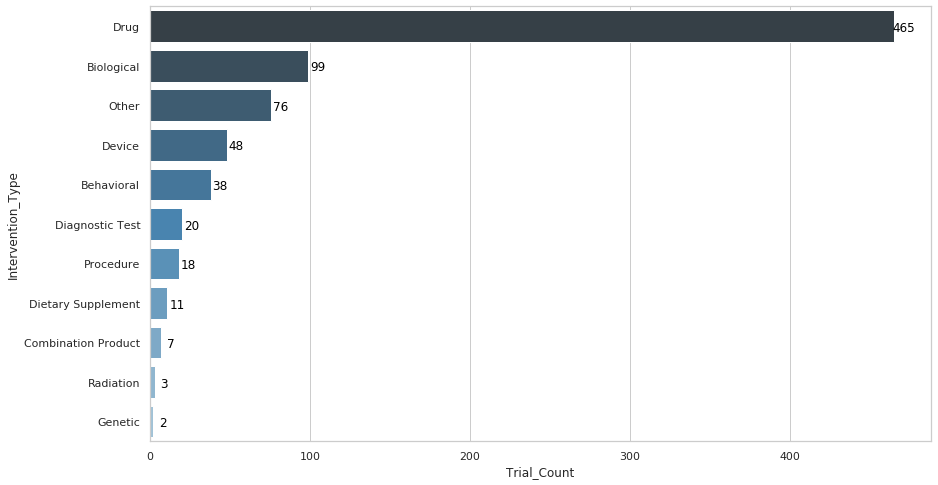

In [31]:
plt.figure(figsize=(14,8))
graph = sns.barplot(y="Intervention_Type", x="Trial_Count", data=tt, palette="Blues_d")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+6, p.get_y()+0.6),
                    ha='center', va='bottom',
                    color= 'black')

In [32]:
tt = pd.DataFrame(df.groupby("DesignPrimaryPurpose").DesignPrimaryPurpose.count())
tt = tt.rename(index=str, columns={"DesignPrimaryPurpose": "Trial_Count"})
tt['Primary_Purpose'] = tt.index
tt=tt.sort_values(by=['Trial_Count'], ascending=False)
tt = tt.reset_index(drop=True)
tt

,Trial_Count,Primary_Purpose
0,569,Treatment
1,106,Prevention
2,32,Supportive Care
3,28,Diagnostic
4,27,Other
5,11,Health Services Research
6,6,Basic Science
7,6,Screening
8,2,Device Feasibility


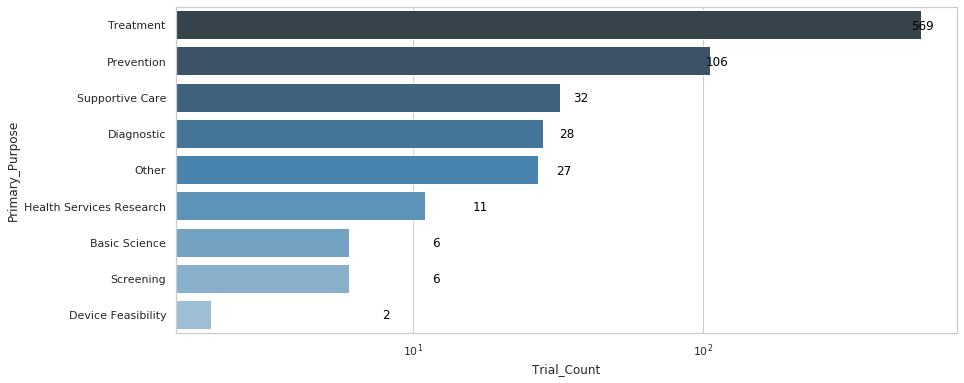

In [34]:
plt.figure(figsize=(14,6))
graph = sns.barplot(y="Primary_Purpose", x="Trial_Count", data=tt, palette="Blues_d", log=True)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+6, p.get_y()+0.6),
                    ha='center', va='bottom',
                    color= 'black')

In [18]:
tt = df.loc[df.DesignPrimaryPurpose=='Treatment',]
tt.shape

(366, 21)

In [19]:
tt = pd.DataFrame(tt.groupby("InterventionType").InterventionType.count())
tt = tt.rename(index=str, columns={"InterventionType": "Trial_Count"})
tt['Intervention_Type'] = tt.index
tt = tt.reset_index(drop=True)
tt=tt.sort_values(by=['Trial_Count'], ascending=False)
tt

,Trial_Count,Intervention_Type
5,273,Drug
1,41,Biological
7,18,Other
3,11,Device
0,7,Behavioral
8,7,Procedure
4,4,Dietary Supplement
2,3,Combination Product
6,1,Genetic
9,1,Radiation


Text(0.5, 1.0, 'Intervention Type distribution where Purpose = Treatment')

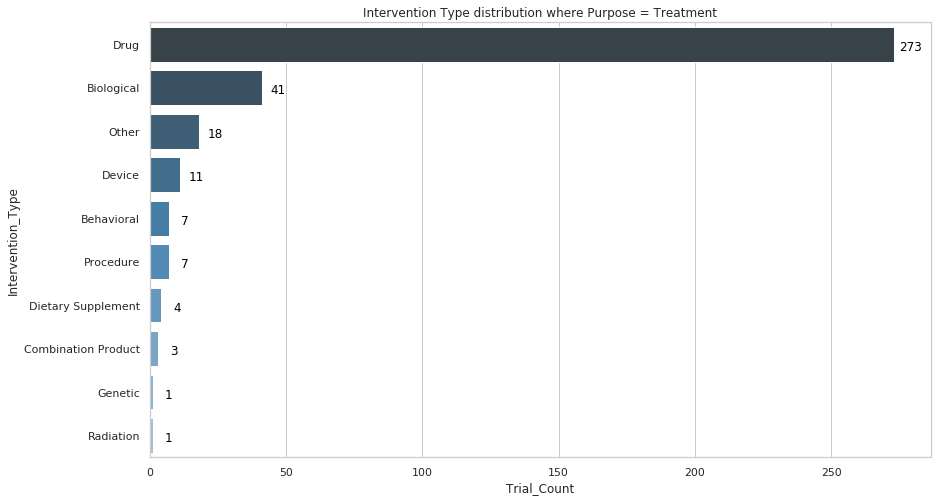

In [20]:
plt.figure(figsize=(14,8))
graph = sns.barplot(y="Intervention_Type", x="Trial_Count", data=tt, palette="Blues_d")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+6, p.get_y()+0.6),
                    ha='center', va='bottom',
                    color= 'black')
graph.set_title('Intervention Type distribution where Purpose = Treatment')

**Lets look at the widely used drugs for treatment of covid-19**

In [21]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Drug'),]
tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
covid_drugs = tt1.sort_values('NCTId', ascending=False)
covid_drugs.shape, covid_drugs.iloc[:15,]

((191, 2),
                InterventionName  NCTId
 79           Hydroxychloroquine     26
 164                 Tocilizumab      7
 87   Hydroxychloroquine Sulfate      5
 137                  Remdesivir      5
 65                  Favipiravir      4
 47                       DAS181      4
 44                   Colchicine      4
 20                 Azithromycin      4
 105         Lopinavir/ritonavir      4
 120            Nitric Oxide Gas      3
 33                  Chloroquine      3
 31            Camostat Mesilate      3
 146                   Sarilumab      3
 140                 Ruxolitinib      3
 106                    Losartan      3)

**Lets look at the widely used biologicals for treatment of covid-19**

In [22]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Biological'),]
tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
covid_drugs = tt1.sort_values('NCTId', ascending=False)
covid_drugs.shape, covid_drugs.iloc[:15,]

((31, 2),
                                      InterventionName  NCTId
 8                                 Convalescent Plasma      6
 29                anti-SARS-CoV-2 convalescent plasma      3
 24                                            UC-MSCs      3
 17                                               MSCs      2
 0                              Allogeneic NK transfer      1
 16  Injection and infusion of LV-SMENP-DC vaccine ...      1
 28  allogeneic human dental pulp stem cells (BSH B...      1
 27                                            WJ-MSCs      1
 26       Umbilical cord Wharton's jelly-derived human      1
 25              Umbilical Cord Mesenchymal Stem Cells      1
 23                             Pathogen-specific aAPC      1
 22                                          NestCell®      1
 21  NK cells,IL15-NK cells,NKG2D CAR-NK cells,ACE2...      1
 20                                           NK Cells      1
 19  Multiple Doses of Anti-SARS-CoV-2 convalescent...      

In [23]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Dietary Supplement'),]
tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
covid_drugs = tt1.sort_values('NCTId', ascending=False)
covid_drugs.shape, covid_drugs.iloc[:15,]

((4, 2),
   InterventionName  NCTId
 0    Natural Honey      1
 1        Vitamin C      1
 2        Vitamin D      1
 3   Zinc gluconate      1)

Let's make this exploration interactive

In [29]:
from ipywidgets import interact

In [34]:
@interact(Purpose=['Treatment', 'Prevention', 'Supportive Care','Diagnostic'])
def plot(Purpose):
    tt = df.loc[df.DesignPrimaryPurpose==Purpose,]
    tt = pd.DataFrame(tt.groupby("InterventionType").InterventionType.count())
    tt = tt.rename(index=str, columns={"InterventionType": "Trial_Count"})
    tt['Intervention_Type'] = tt.index
    tt = tt.reset_index(drop=True)
    tt=tt.sort_values(by=['Trial_Count'], ascending=False)
    plt.figure(figsize=(14,8))
    graph = sns.barplot(y="Intervention_Type", x="Trial_Count", data=tt, palette="Blues_d")
    for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+6, p.get_y()+0.6), ha='center', va='bottom', color= 'black')

interactive(children=(Dropdown(description='Purpose', options=('Treatment', 'Prevention', 'Supportive Care', '…

In [33]:
@interact(Intervention=['Drug','Biological','device','Behavioral','Dietary Supplement'])
def plot(Intervention):
    tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType==Intervention),]
    tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
    covid_drugs = tt1.sort_values('NCTId', ascending=False)
    print(covid_drugs.iloc[:15,])

interactive(children=(Dropdown(description='Intervention', options=('Drug', 'Biological', 'device', 'Behaviora…